In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib as mpl
import pickle

import readdy_learn.example.predator_prey as pp

In [2]:
TARGET_TIME = 20
pp.TIMESTEP = 1e-1

In [3]:
time, count, dcount_dt = pp.generate_lma(0, TARGET_TIME)
len(time)

200

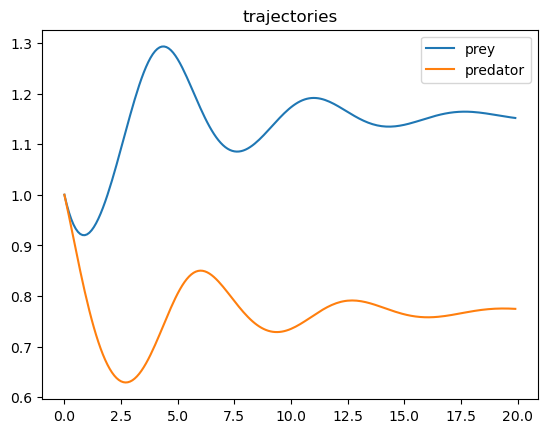

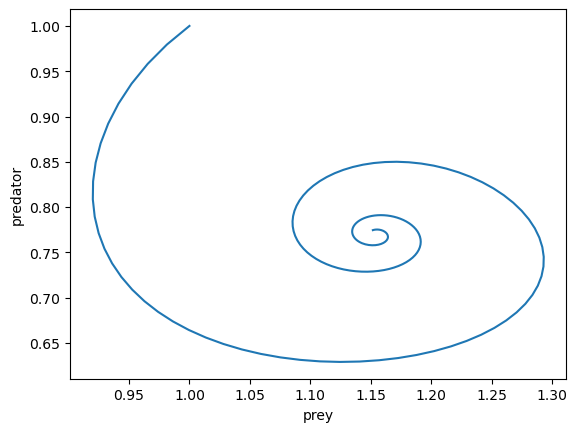

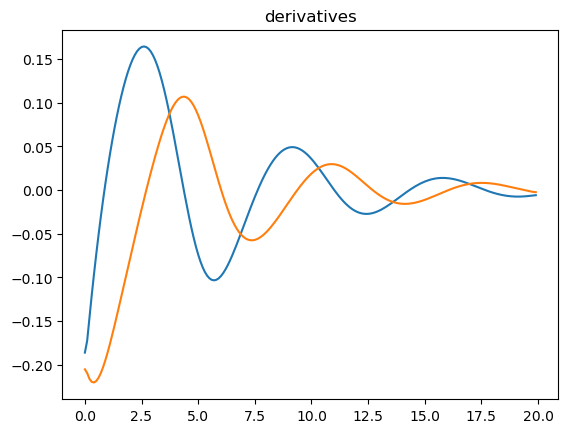

In [4]:
plt.plot(time, count[:, 0], label='prey')
plt.plot(time, count[:, 1], label='predator')
plt.title('trajectories')
plt.legend()
plt.show()

plt.plot(count[:, 0], count[:, 1])
plt.xlabel('prey')
plt.ylabel('predator')
plt.show()

plt.plot(time,  dcount_dt)
plt.title('derivatives')
plt.show()

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully
91 / 30000 iterations


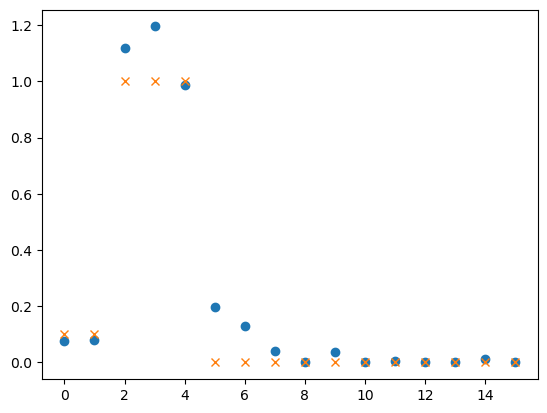

In [5]:
X = pp.solve(count, dcount_dt, 0., 1.)
#print("Absolute error:", X-pp.RATES)
#print("Relative error:", (X - pp.RATES) / pp.RATES)
plt.plot(X, 'o')
plt.plot(pp.RATES, 'x')

In [6]:
result_gridsolve = pp.solve_grid(counts=count, dcounts_dt=dcount_dt, alphas=np.logspace(-10, -3, num=100), 
                                 l1_ratios=1., njobs=8)

Trying tolerance 1e-16Trying tolerance 1e-16

Trying tolerance 1e-16Trying tolerance 1e-16Trying tolerance 1e-16Trying tolerance 1e-16


Trying tolerance 1e-16Trying tolerance 1e-16


optimization problem did exit successfully (alpha=1.176811952434999e-10, lambda=1.0)!
status 0: Optimization terminated successfullyoptimization problem did exit successfully (alpha=1.3848863713938747e-10, lambda=1.0)!

102 / 30000 iterationsstatus 0: Optimization terminated successfully

109 / 30000 iterationsTrying tolerance 1e-16

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-10, lambda=1.0)!
status 0: Optimization terminated successfully
102 / 30000 iterationsoptimization problem did exit successfully (alpha=2.656087782946684e-10, lambda=1.0)!optimization problem did exit successfully (alpha=1.9179102616724848e-10, lambda=1.0)!


status 0: Optimization terminated successfullyTrying tolerance 1e-16
status 0: Optimization terminated successfullyoptimization problem did exit

In [7]:
alphas_gs = np.array([res[0] for res in result_gridsolve])
sort = np.argsort(alphas_gs)
alphas_gs = alphas_gs[sort]
estimated_rates_gs = np.array([res[2] for res in result_gridsolve])
estimated_rates_gs = estimated_rates_gs[sort]
l1_errs_gs = np.sum(np.abs(estimated_rates_gs - pp.RATES), axis=1)

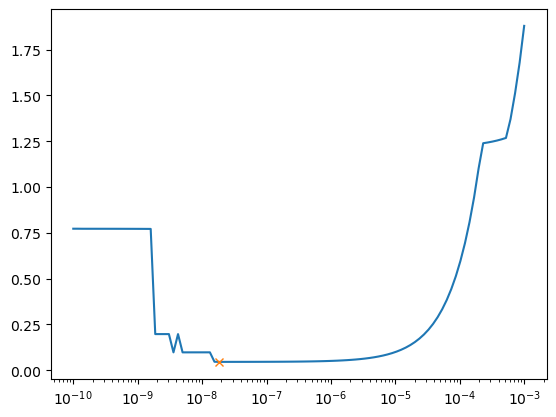

In [8]:
plt.semilogx(alphas_gs, l1_errs_gs)
plt.plot([alphas_gs[np.argmin(l1_errs_gs)]], [l1_errs_gs[np.argmin(l1_errs_gs)]], 'x')

In [9]:
best_estimated_rates_gs = estimated_rates_gs[np.argmin(l1_errs_gs)]

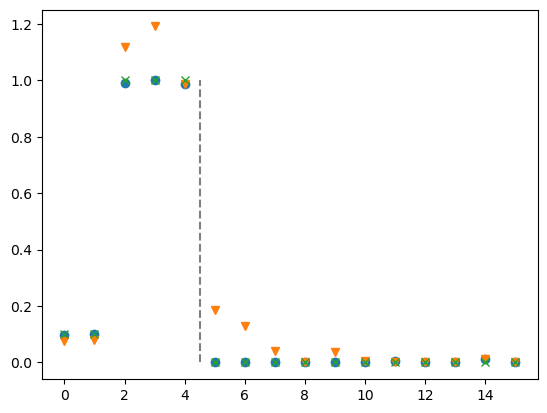

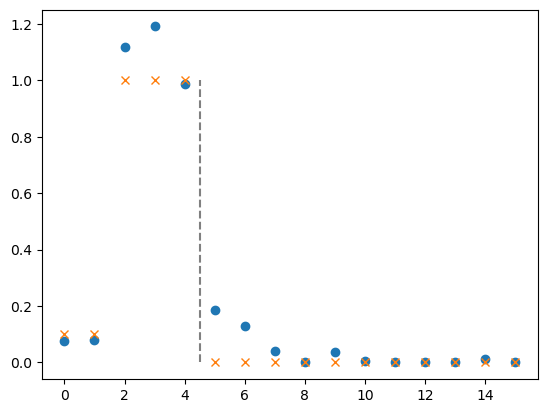

In [10]:
%matplotlib inline
plt.plot(best_estimated_rates_gs, 'o')
plt.vlines([4.5], 0, 1, 'grey', 'dashed')
plt.plot(estimated_rates_gs[0], 'v')
plt.plot(pp.RATES, 'x')
plt.show()
plt.plot(estimated_rates_gs[0], 'o')
plt.vlines([4.5], 0, 1, 'grey', 'dashed')
plt.plot(pp.RATES, 'x')
plt.show()

In [11]:
N = np.arange(len(count))
np.random.shuffle(N)
shuffled_count = count[N]
shuffled_dcount_dt = dcount_dt[N]

In [12]:
res = pp.cv(shuffled_count, shuffled_dcount_dt, alphas=np.logspace(-9, -4, num=100), n_splits=5, njobs=8)

AttributeError: `np.alltrue` was removed in the NumPy 2.0 release. Use `np.all` instead.

 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]

Solving for tolerance 1e-16
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]

Solvin

 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]

Solving for tolerance 1e-16
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91 

 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]

Solving for tolerance 1e-16

Solving for tolerance 1e-16
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test:

 116 117 118 119]

Solving for tolerance 1e-16
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 1

 116 117 118 119]Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]

Solving for tolerance 1e-16
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 1

 116 117 118 119]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]

Solving for toleranc

 196 197 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]

Solving for tolerance 1e-16
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 1

 196 197 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Running kfold with n_splits=5
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for to

Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]

Solving for tolerance 1e-16
Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]Solving for tolerance 1e-16

Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Running kfold with n_splits=5
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15


Solving for tolerance 1e-16
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tole

In [15]:
alphas = []
scores = []
all_scores = []
scores_std = []
cv_result = res
for res in cv_result['cv_result']:
    alphas.append(res['alpha'])
    scores.append(np.mean(res['score']))
    scores_std.append(np.std(res['score']))
    all_scores.append(res['score'])
alphas = np.array(alphas)
scores = np.array(scores)
scores_std = np.array(scores_std)
all_scores = np.array(all_scores)
N = np.argsort(alphas)
alphas = alphas[N]
scores = scores[N]
scores_std = scores_std[N]
all_scores = all_scores[N]

(6.25e-07, 6.75e-07)

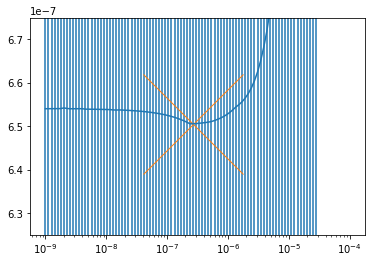

In [19]:
plt.xscale('log')
plt.errorbar(alphas, -scores, yerr=scores_std, fmt='-')
plt.plot([alphas[np.argmin(-scores)]], [-scores[np.argmin(-scores)]], 'x', markersize=100)
plt.ylim([6.25e-7, 6.75e-7])

In [23]:
rates = pp.solve(shuffled_count, shuffled_dcount_dt, alpha=alphas[np.argmin(-scores)], l1_ratio=1.)
rates_lsq = pp.solve(shuffled_count, shuffled_dcount_dt, alpha=0, l1_ratio=1.)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.656087782946684e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
148 / 30000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0, lambda=1.0)!
status 0: Optimization terminated successfully.
91 / 30000 iterations


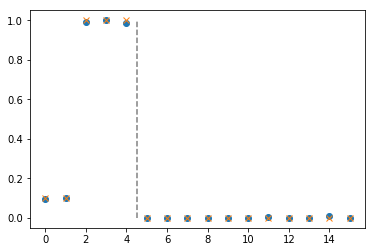

In [21]:
plt.plot(rates, 'o')
plt.vlines([4.5], 0, 1, 'grey', 'dashed')
plt.plot(pp.RATES, 'x')
plt.show()

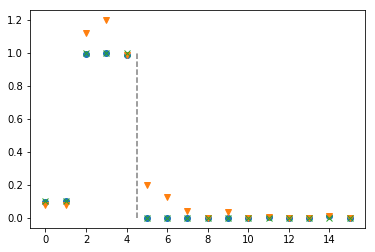

In [24]:
plt.plot(rates, 'o')
plt.vlines([4.5], 0, 1, 'grey', 'dashed')
plt.plot(rates_lsq, 'v')
plt.plot(pp.RATES, 'x')
plt.show()

In [25]:
np.savez('predator_prey_data.npz', time=time, counts=count, dcounts_dt=dcount_dt, 
         alphas_gs=alphas_gs, l1_errs_gs=l1_errs_gs, estimated_rates_gs=estimated_rates_gs,
         best_estimated_rates_gs=best_estimated_rates_gs, alphas_cv=alphas, 
         scores_cv=scores, scores_std_cv=scores_std, 
         rates_cv=rates, rates_lsq=rates_lsq, rates_desired=pp.RATES)